In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/COVID-19_Case_Surveillance_Public_Use_Data.csv')

In [3]:
data.head()

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,2021/04/25,2021/04/25,NaN,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Unknown,Missing,Missing,Missing
1,2020/12/22,2020/12/22,NaN,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Missing,No,Unknown
2,2020/11/19,2020/11/25,NaN,2020/11/19,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Missing
3,2020/12/30,2020/12/31,NaN,2020/12/30,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,Missing,Missing
4,2021/03/26,2021/03/31,2021/03/27,2021/03/26,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Unknown,No,Unknown


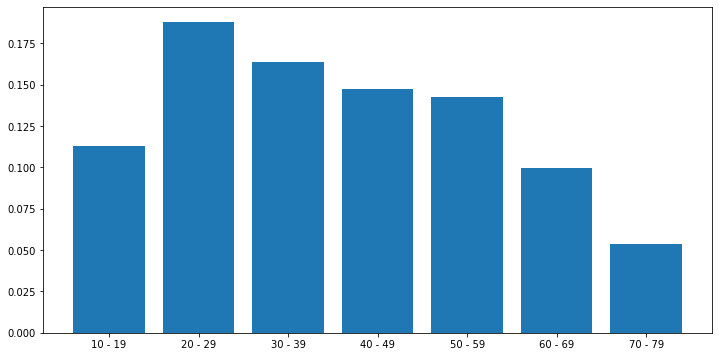

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.bar(range(1, 8), [np.mean(data.age_group == f'{i}0 - {i}9 Years') for i in range(1, 8)])
ax.set_xticks(range(1, 8))
ax.set_xticklabels([f'{i}0 - {i}9' for i in range(1, 8)]);

In [7]:
data = data.drop(columns=['cdc_case_earliest_dt ', 'cdc_report_dt', 'pos_spec_dt', 'onset_dt'])
data.head()

,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Unknown,Missing,Missing,Missing
1,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Missing,No,Unknown
2,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Missing
3,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,Missing,Missing
4,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Unknown,No,Unknown


In [8]:
data.current_status = data.current_status.map({'Laboratory-confirmed case': 1, 'Probable Case': 0})
data.sex = data.sex.map({'Missing': np.nan, 'Male': 0, 'Other': np.nan, 'Female': 1})
data.hosp_yn = data.hosp_yn.map({'Missing': np.nan, 'No': 0, 'Unknown': np.nan, 'Yes': 1})
data.icu_yn = data.icu_yn.map({'Missing': np.nan, 'No': 0, 'Unknown': np.nan, 'Yes': 1})
data.death_yn = data.death_yn.map({'Missing': np.nan, 'No': 0, 'Unknown': np.nan, 'Yes': 1})
data.medcond_yn = data.medcond_yn.map({'Missing': np.nan, 'No': 0, 'Unknown': np.nan, 'Yes': 1})
data.head()

,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,1,0.0,10 - 19 Years,"Black, Non-Hispanic",NaN,NaN,NaN,NaN
1,1,0.0,10 - 19 Years,"Black, Non-Hispanic",0.0,NaN,0.0,NaN
2,1,0.0,10 - 19 Years,"Black, Non-Hispanic",0.0,0.0,0.0,NaN
3,1,0.0,10 - 19 Years,"Black, Non-Hispanic",NaN,NaN,NaN,NaN
4,1,0.0,10 - 19 Years,"Black, Non-Hispanic",0.0,NaN,0.0,NaN


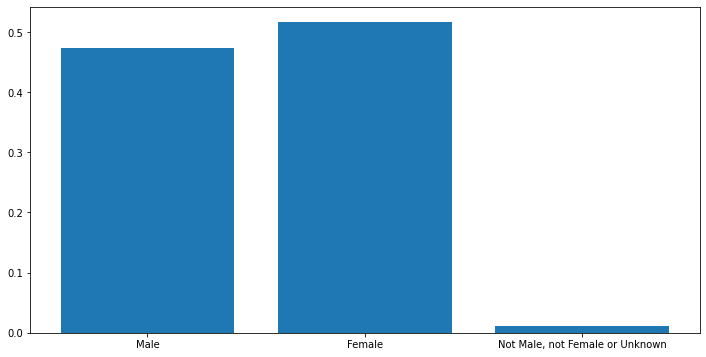

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.bar([0, 1, 2], [np.mean(data.sex == 0), np.mean(data.sex == 1), np.mean(np.isnan(data.sex))])
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Male', 'Female', 'Not Male, not Female or Unknown']);